Aplikasi Streamlit	: [Loan Approval Prediction · Streamlit](https://2702302183-gabriellaclairine.streamlit.app/)

GitHub	        	: [gabriellaclairine/UTSMoDep: Gabriella Clairine](https://github.com/gabriellaclairine/UTSMoDep)

Link Video		    : [UTS Model Deployment (Gabriella Clairine - 2702302183)](https://www.youtube.com/watch?v=In-GvBTwhqE)

## Import Dataset & Necessary library

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_auc_score, roc_curve, confusion_matrix, classification_report, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, average_precision_score

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

import pickle


In [41]:
df_raw = pd.read_csv("Dataset_A_loan.csv")
df_raw

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


## Exploratory Data Analysis

### Check data types dan missing values

In [42]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   42750 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

- **person_age** = Usia dari orang tersebut  
- **person_gender** = Gender dari orang tersebut  
- **person_education** = Tingkat pendidikan tertinggi  
- **person_income** = Pendapatan tahunan  
- **person_emp_exp** = Tahun pengalaman bekerja  
- **person_home_ownership** = Status kepemilikan tempat huni  
- **loan_amnt** = Jumlah pinjaman yang diminta  
- **loan_intent** = Tujuan dari pinjaman  
- **loan_int_rate** = Suku bunga pinjaman  
- **loan_percent_income** = Jumlah pinjaman sebagai persentase dari pendapatan tahunan  
- **cb_person_cred_hist_length** = Durasi kredit dalam tahun  
- **credit_score** = Skor kredit dari orang tersebut  
- **previous_loan_defaults_on_file** = Indikator tunggakan pinjaman sebelumnya  
- **loan_status (target variable)** = Persetujuan pinjaman; 1: diterima dan 0: ditolak 

In [43]:
df_raw.describe(exclude='object')

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.275000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.018223e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,7.331158e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.726725e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.705500e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.582125e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,5.556399e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [44]:
df_raw.describe(include='object')

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
count,45000,45000,45000,45000,45000
unique,4,5,4,6,2
top,male,Bachelor,RENT,EDUCATION,Yes
freq,24799,13399,23443,9153,22858


In [45]:
# specify the numerical and categorical column

numerical_cols = df_raw.select_dtypes(exclude='object').columns.tolist()
categorical_cols = df_raw.select_dtypes(include='object').columns.tolist()

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

Categorical columns: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
Numerical columns: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']


In [46]:
# Input: data frame containing raw data with potential missing values
# Process: calculate the count and percentage of missing values for each column and display the results
# Output: printed summary of missing value counts and percentages for each column
def check_na_count (df):
    missing_values = df.isna().sum()
    missing_percentage = (missing_values / df.shape[0]) * 100

    for column in df.columns:
        print(f"{column} -> Count = {missing_values[column]}, Percentage = {missing_percentage[column]:.2f}%")

In [47]:
# check null value
check_na_count(df_raw)

person_age -> Count = 0, Percentage = 0.00%
person_gender -> Count = 0, Percentage = 0.00%
person_education -> Count = 0, Percentage = 0.00%
person_income -> Count = 2250, Percentage = 5.00%
person_emp_exp -> Count = 0, Percentage = 0.00%
person_home_ownership -> Count = 0, Percentage = 0.00%
loan_amnt -> Count = 0, Percentage = 0.00%
loan_intent -> Count = 0, Percentage = 0.00%
loan_int_rate -> Count = 0, Percentage = 0.00%
loan_percent_income -> Count = 0, Percentage = 0.00%
cb_person_cred_hist_length -> Count = 0, Percentage = 0.00%
credit_score -> Count = 0, Percentage = 0.00%
previous_loan_defaults_on_file -> Count = 0, Percentage = 0.00%
loan_status -> Count = 0, Percentage = 0.00%


In [48]:
# check duplicate value
df_raw.duplicated().sum()

0

In [49]:
# remove duplicate valuue
df_raw2 = df_raw.copy()

### Check data distribution & outliers

person_age


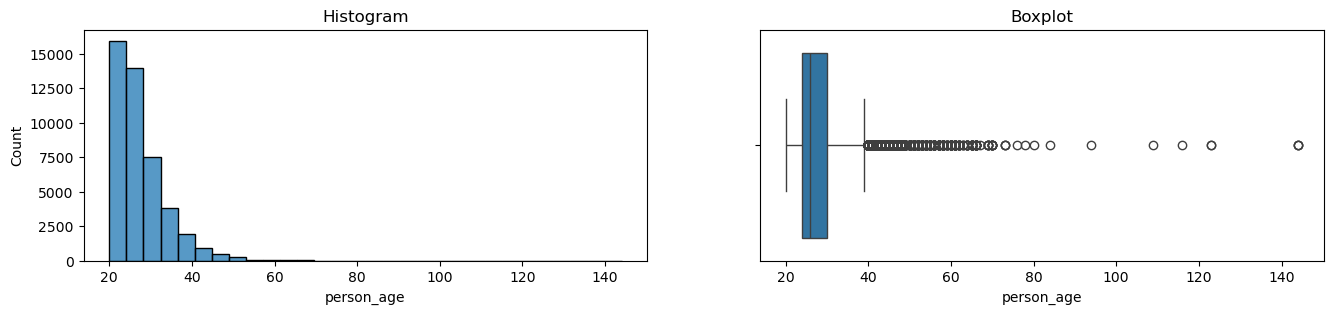

Skewness: 2.5481540050382425
Kurtosis: 18.64944898184852
person_income


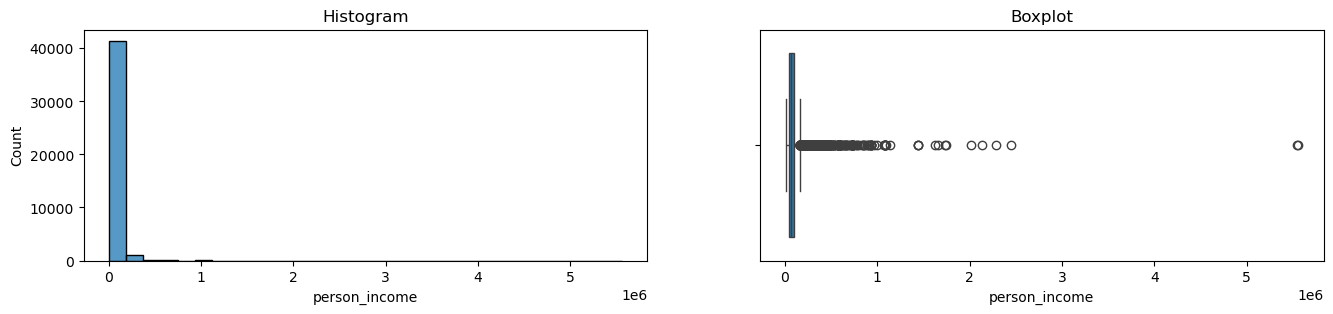

Skewness: 25.60673912825341
Kurtosis: 1569.8526113553646
person_emp_exp


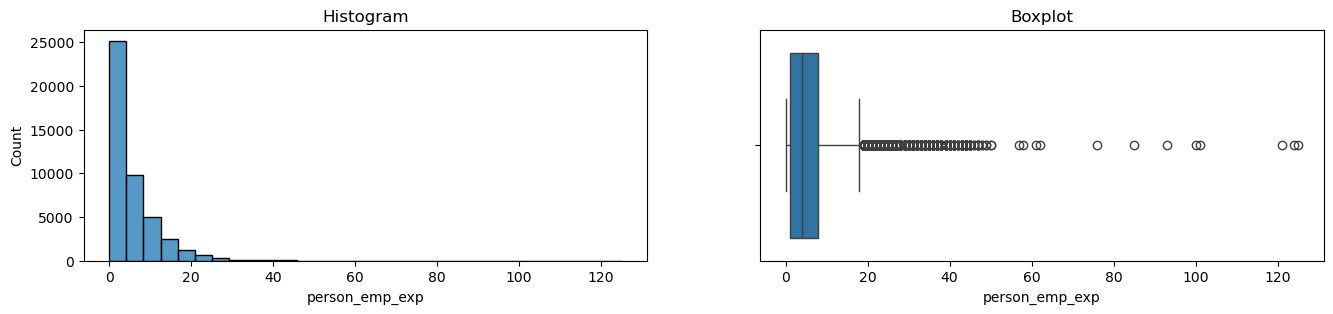

Skewness: 2.5949173726318255
Kurtosis: 19.1683237539473
loan_amnt


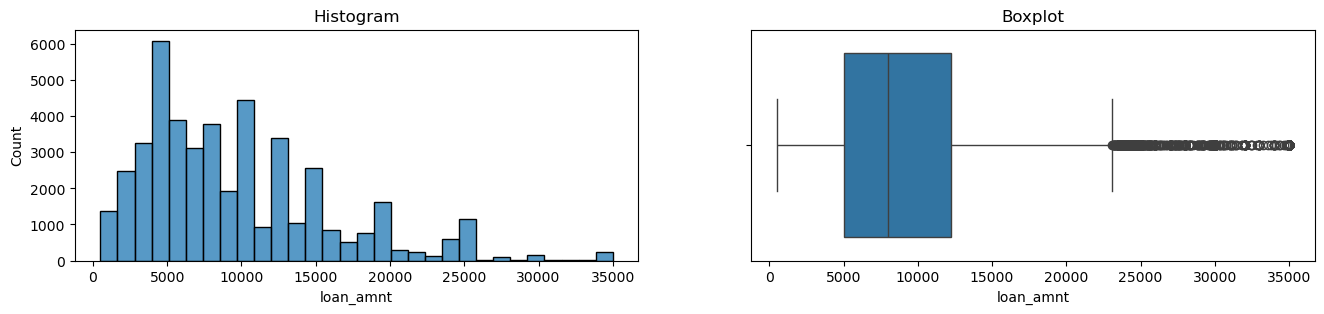

Skewness: 1.1797312856279223
Kurtosis: 1.3512152308228198
loan_int_rate


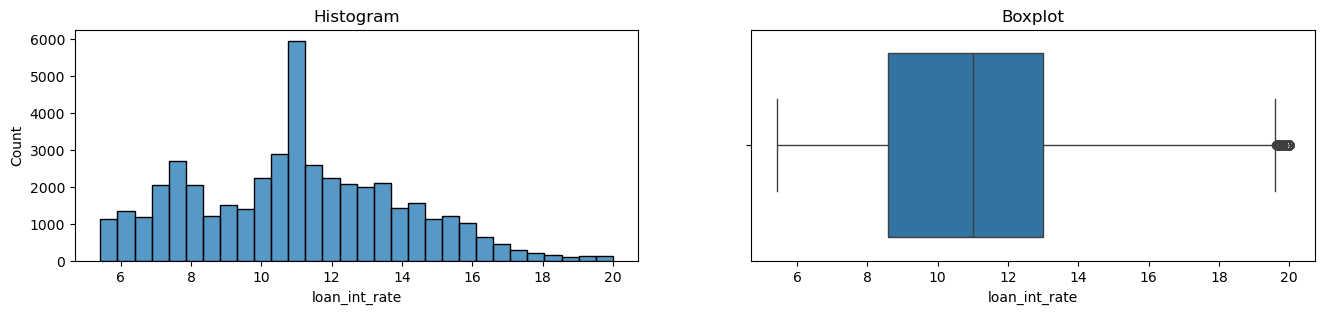

Skewness: 0.21378407238735642
Kurtosis: -0.42033530822379506
loan_percent_income


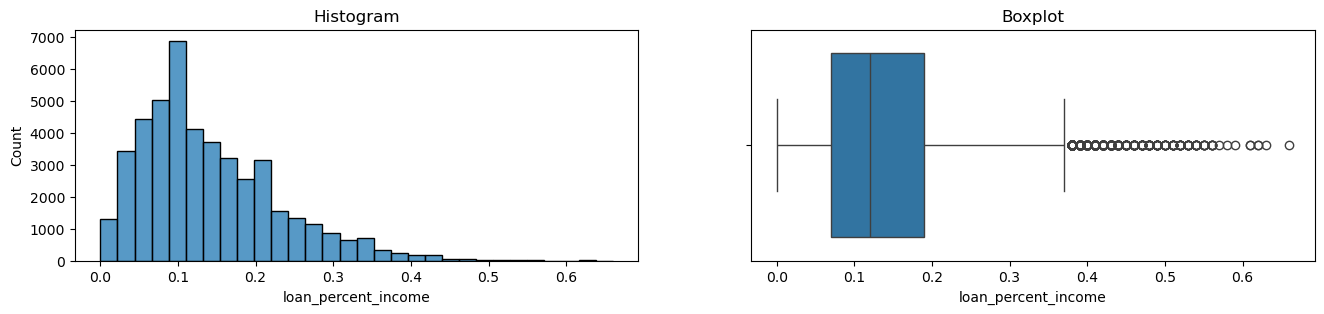

Skewness: 1.034512151182724
Kurtosis: 1.0824162412535965
cb_person_cred_hist_length


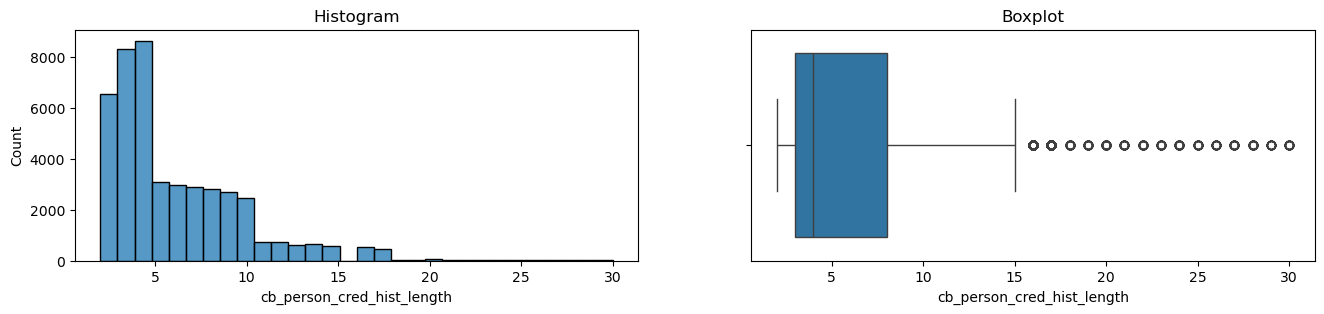

Skewness: 1.6317199538415355
Kurtosis: 3.725944524091197
credit_score


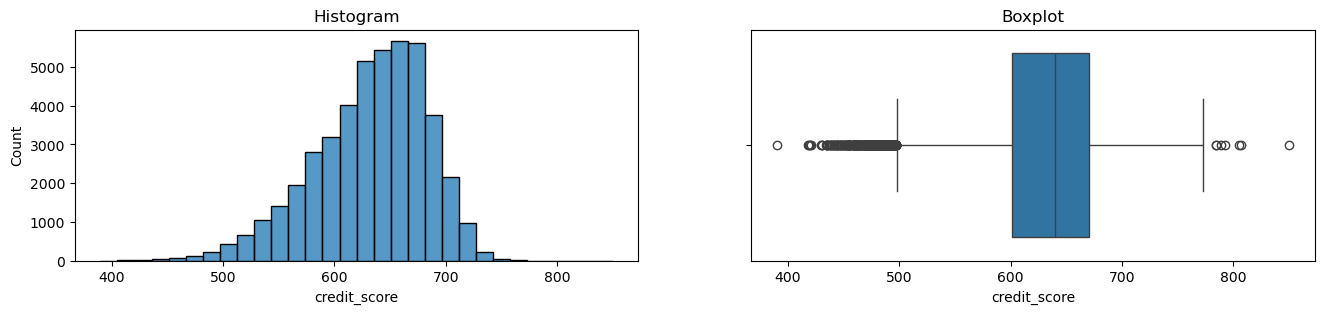

Skewness: -0.6102608322577946
Kurtosis: 0.20302185635702363
loan_status


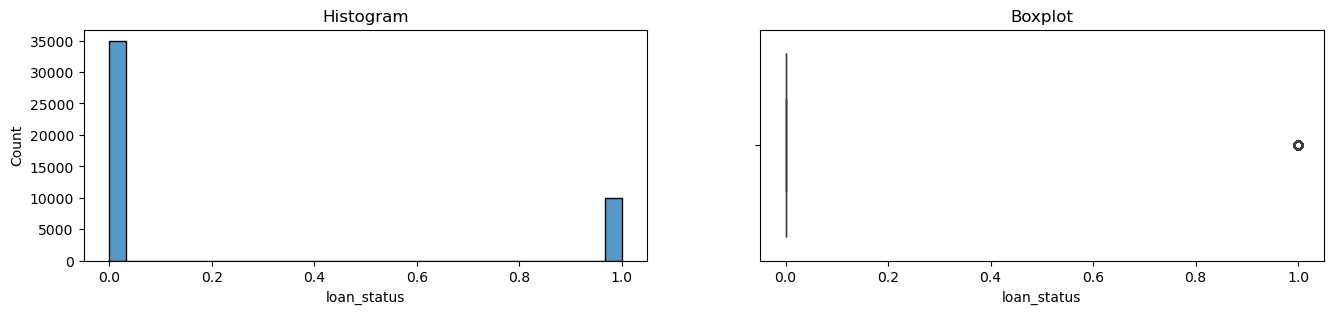

Skewness: 1.3363507549997484
Kurtosis: -0.21417618052832044


In [50]:
# check boxplot and histogram function and also check the skewness and kurtosis
def check_distribution_outliers(df, columns):
    for col in columns:
        print(col)
        plt.figure(figsize=(16, 3))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], bins=30)
        plt.title('Histogram')

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col])
        plt.title('Boxplot')

        plt.show()

        print('Skewness:', df[col].skew())
        print('Kurtosis:', df[col].kurt())

check_distribution_outliers(df_raw2[numerical_cols], numerical_cols)

### Check Correlation

In [51]:
# Hitung korelasi
correlation_matrix = df_raw2.corr(numeric_only=True)

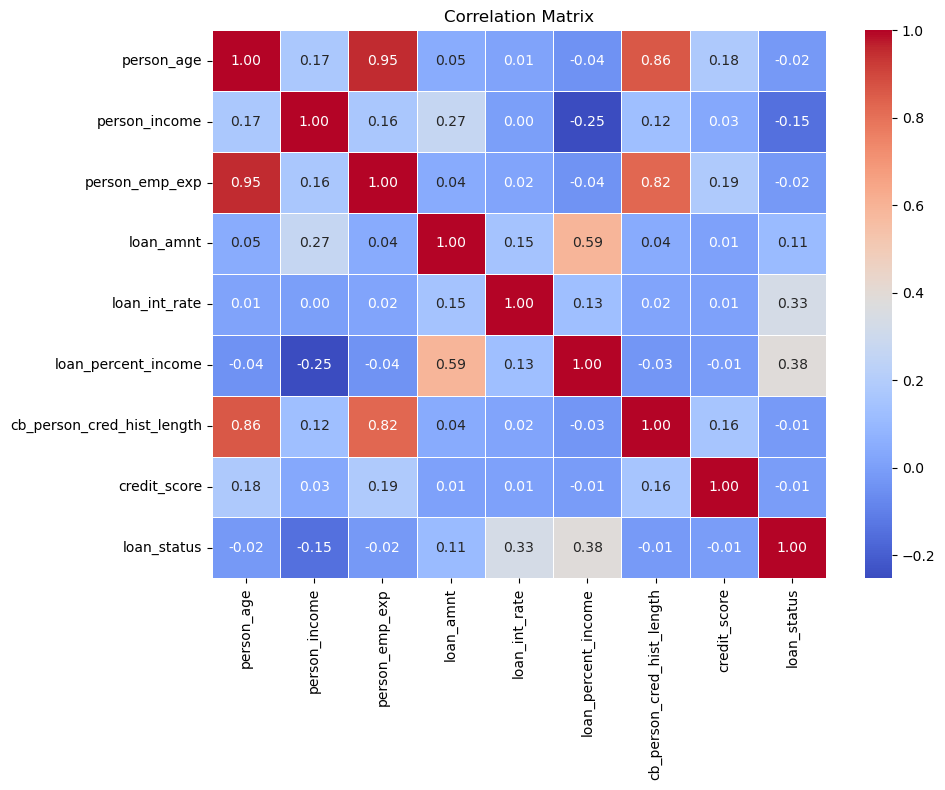

In [52]:
# Plot heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
# plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Identify and filling missing values

In [53]:
df_raw3 = df_raw2.copy()

In [54]:
# fills missing values in the person_income column with the median for that column, grouped by loan_status
df_raw3['person_income'] = df_raw3.groupby('loan_status')['person_income'].transform(
    lambda x: x.fillna(x.median())
)

In [55]:
check_na_count(df_raw3)

person_age -> Count = 0, Percentage = 0.00%
person_gender -> Count = 0, Percentage = 0.00%
person_education -> Count = 0, Percentage = 0.00%
person_income -> Count = 0, Percentage = 0.00%
person_emp_exp -> Count = 0, Percentage = 0.00%
person_home_ownership -> Count = 0, Percentage = 0.00%
loan_amnt -> Count = 0, Percentage = 0.00%
loan_intent -> Count = 0, Percentage = 0.00%
loan_int_rate -> Count = 0, Percentage = 0.00%
loan_percent_income -> Count = 0, Percentage = 0.00%
cb_person_cred_hist_length -> Count = 0, Percentage = 0.00%
credit_score -> Count = 0, Percentage = 0.00%
previous_loan_defaults_on_file -> Count = 0, Percentage = 0.00%
loan_status -> Count = 0, Percentage = 0.00%


### Encoding

In [56]:
for i in categorical_cols:
    print(df_raw3[i].value_counts())

person_gender
male       24799
female     20111
Male          45
fe male       45
Name: count, dtype: int64
person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64
person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64
loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64
previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64


There are some inconsistency on values for the person_gender column, so we are going to replace the values accordingly.

In [57]:
df_raw3['person_gender'] = df_raw3['person_gender'].str.lower().str.replace(' ', '')
df_raw3['person_gender'] = df_raw3['person_gender'].replace({'male': 'Male', 'female': 'Female'})
df_raw3['person_gender'].value_counts()

person_gender
Male      24844
Female    20156
Name: count, dtype: int64

In [58]:
df_raw3['previous_loan_defaults_on_file'] = df_raw3['previous_loan_defaults_on_file'].map({'Yes': 1, 'No': 0}).astype(int)
df_raw3['previous_loan_defaults_on_file'].value_counts()

previous_loan_defaults_on_file
1    22858
0    22142
Name: count, dtype: int64

In [59]:
for i in categorical_cols:
    print(df_raw3[i].value_counts())

person_gender
Male      24844
Female    20156
Name: count, dtype: int64
person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64
person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64
loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64
previous_loan_defaults_on_file
1    22858
0    22142
Name: count, dtype: int64


In [60]:
education_order = [['High School', 'Associate', 'Bachelor', 'Master', 'Doctorate']]
ordinal_encoder = OrdinalEncoder(categories=education_order)
df_raw3['person_education'] = ordinal_encoder.fit_transform(df_raw3[['person_education']]).astype(int)

In [61]:
onehot_cols = ['person_gender', 'person_home_ownership', 'loan_intent']

# Inisialisasi encoder
onehot_encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid dummy variable trap

# Fit dan transform
onehot_array = onehot_encoder.fit_transform(df_raw3[onehot_cols])

# Ambil nama kolom baru
onehot_feature_names = onehot_encoder.get_feature_names_out(onehot_cols)

# Gabungkan ke df_raw3
df_onehot = pd.DataFrame(onehot_array, columns=onehot_feature_names, index=df_raw3.index)
df_raw3 = pd.concat([df_raw3.drop(columns=onehot_cols), df_onehot], axis=1)

c:\Users\User\.conda\envs\default_env\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [62]:
df_raw3.head()

,person_age,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,person_gender_Male,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,3,71948.0,0,35000.0,16.02,0.49,3.0,561,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,21.0,0,12282.0,0,1000.0,11.14,0.08,2.0,504,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,25.0,0,12438.0,3,5500.0,12.87,0.44,3.0,635,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,23.0,2,79753.0,0,35000.0,15.23,0.44,2.0,675,0,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,24.0,3,66135.0,1,35000.0,14.27,0.53,4.0,586,0,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### Handling outliers

We decided **not to handle the outliers** because they still make sense in the context of real cases.

## Splitting

In [ ]:
df = df_raw3.copy()
X = df.drop('loan_status',axis=1) # features
y = df['loan_status'] # target

In [65]:
numerical_cols.remove('loan_status')

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle=True, stratify=y)

In [67]:
print(y_train.value_counts())
print(y_test.value_counts())

loan_status
0    28000
1     8000
Name: count, dtype: int64
loan_status
0    7000
1    2000
Name: count, dtype: int64


## Scalling data

In [69]:
# apply RobustScaler to the numerical columns
rb_scaler = RobustScaler()
X_train[numerical_cols] = rb_scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = rb_scaler.transform(X_test[numerical_cols])

In [70]:
X_train.head().reset_index(drop=True)

,person_age,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,person_gender_Male,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,-0.333333,1,-0.052002,-0.285714,-0.436908,-0.567568,-0.416667,-0.4,-0.333333,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.500000,2,-0.848473,0.000000,-0.554804,-1.259009,0.083333,0.4,-0.623188,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.166667,3,-0.047596,0.428571,3.328826,0.950450,3.083333,0.6,-1.362319,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.833333,2,0.333883,0.571429,-0.277402,-0.792793,-0.416667,0.4,0.231884,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.166667,2,0.639596,0.142857,0.000000,-1.024775,-0.333333,0.2,-0.188406,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Fit to Machine Learning Model

### 1. Random Forest

#### Modelling

In [71]:
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

#### Hyperparameter Tuning

In [72]:
params_rf = {
    "n_estimators": [100, 200],
    "max_depth": [None, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

In [73]:
grid_search_rf = GridSearchCV(rf_model, params_rf, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

c:\Users\User\.conda\envs\default_env\lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 20], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]})

In [74]:
print(grid_search_rf.best_params_)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [75]:
rf2 = grid_search_rf.best_estimator_
rf2.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

#### Classification Report

In [76]:
print(classification_report(y_test, rf_model.predict(X_test), target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      7000
           1       0.90      0.77      0.83      2000

    accuracy                           0.93      9000
   macro avg       0.92      0.88      0.90      9000
weighted avg       0.93      0.93      0.93      9000



In [77]:
print(classification_report(y_test, rf2.predict(X_test), target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      7000
           1       0.91      0.77      0.83      2000

    accuracy                           0.93      9000
   macro avg       0.92      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000



### 2. XGBoost

#### Modelling

In [78]:
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

#### Hyperparameter Tuning

In [80]:
params_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

In [81]:
grid_search_xgb = GridSearchCV(xgb_model, params_xgb)
grid_search_xgb.fit(X_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 6],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1]})

In [82]:
# print(xgb_model.get_params())
print(grid_search_xgb.best_params_)

{'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 1}


In [83]:
xgb2 = grid_search_xgb.best_estimator_
xgb2.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

#### Classification Report

In [84]:
print(classification_report(y_test, xgb_model.predict(X_test), target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      7000
           1       0.89      0.81      0.85      2000

    accuracy                           0.94      9000
   macro avg       0.92      0.89      0.90      9000
weighted avg       0.94      0.94      0.94      9000



In [85]:
print(classification_report(y_test, xgb2.predict(X_test), target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      7000
           1       0.90      0.81      0.85      2000

    accuracy                           0.94      9000
   macro avg       0.92      0.89      0.91      9000
weighted avg       0.94      0.94      0.94      9000



## Save Model

In [86]:
with open('no1.pkl', 'wb') as f:
    pickle.dump(xgb2, f)